# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [24]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

output_path = os.path.join('..','output_data')

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

646

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [11]:
# Starting URL for Weather Map API Call
api_key = ' '
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={api_key}"

city_data = []

#Get URL for cities
for city in cities:
    
    city_url = url + "&q=" + city

    #Run an API request for each of the cities
    try:
        city_weather = requests.get(city_url).json()

        #Get individual variables
        lat = city_weather["coord"]["lat"]
        lng = city_weather["coord"]["lon"]
        temp = city_weather["main"]["temp_max"]
        humidity = city_weather["main"]["humidity"]
        clouds = city_weather["clouds"]["all"]
        wind = city_weather["wind"]["speed"]
        country = city_weather["sys"]["country"]
        date = city_weather["dt"]

        #Add to list
        city_data.append({"City": city, "Lat": lat, "Lng": lng, "Temp": temp,"Humidity": humidity,
                          "Cloudiness": clouds, "Wind Speed": wind, "Country": country, "Date": date})
    #Error
    except:
        print(f'Error with {city}')
        pass

Error with cockburn harbour
Error with barentsburg
Error with samusu
Error with ye
Error with atka
Error with ijaki
Error with sentyabrskiy
Error with paradwip
Error with tsihombe
Error with belushya guba
Error with afgoye
Error with guicheng
Error with grand river south east
Error with taolanaro
Error with miranorte
Error with mys shmidta
Error with illoqqortoormiut
Error with kadykchan
Error with amderma
Error with umzimvubu
Error with ituni
Error with vaitupu
Error with mogochin
Error with nizhneyansk
Error with balimo
Error with nguiu
Error with zhanatas
Error with grand centre
Error with karaul
Error with chagda
Error with kamenskoye
Error with attawapiskat
Error with mergui
Error with samalaeulu
Error with eskasem
Error with hvammstangi
Error with sinjah
Error with kuche
Error with warqla
Error with katha
Error with pokrovsk-uralskiy
Error with karkaralinsk
Error with lolua
Error with khonuu
Error with viligili
Error with achisay
Error with bolshaya vishera
Error with tienchung
E

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
data_pd = pd.DataFrame(city_data)
data_pd.count()

City          589
Lat           589
Lng           589
Temp          589
Humidity      589
Cloudiness    589
Wind Speed    589
Country       589
Date          589
dtype: int64

In [13]:
data_pd.head(5)

,City,Lat,Lng,Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hermanus,-34.42,19.23,50.00,83,0,1.01,ZA,1594937647
1,hami,42.80,93.45,75.04,33,60,4.43,CN,1594937648
2,jamestown,42.10,-79.24,77.00,88,90,6.93,US,1594937469
3,kavieng,-2.57,150.80,83.46,67,43,3.04,PG,1594937649
4,nantucket,41.28,-70.10,66.99,68,40,9.17,US,1594937649


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [14]:
data_pd.describe()

,Lat,Lng,Temp,Humidity,Cloudiness,Wind Speed,Date
count,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,5.890000e+02
mean,19.781392,15.990696,68.487776,71.269949,51.078098,7.371647,1.594938e+09
std,32.504286,90.430492,14.449315,20.330270,37.748686,4.855531,9.379996e+01
min,-54.800000,-179.170000,19.400000,3.000000,0.000000,0.200000,1.594937e+09
25%,-6.820000,-63.470000,57.200000,60.000000,14.000000,3.600000,1.594938e+09
50%,21.520000,16.820000,69.800000,76.000000,49.000000,6.510000,1.594938e+09
75%,47.500000,99.520000,78.800000,87.000000,90.000000,10.000000,1.594938e+09
max,78.220000,179.320000,104.000000,100.000000,100.000000,28.740000,1.594938e+09


In [7]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pimentel,-6.84,-79.93,66.20,29,75,5.82,PE,1585764415
1,victoria,22.29,114.16,69.01,88,40,18.34,HK,1585764288
2,padang,-0.95,100.35,79.90,75,99,1.63,ID,1585764115
3,hasaki,35.73,140.83,55.00,100,75,4.70,JP,1585764415
4,kahului,20.89,-156.47,70.00,88,1,7.63,US,1585764415


In [9]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

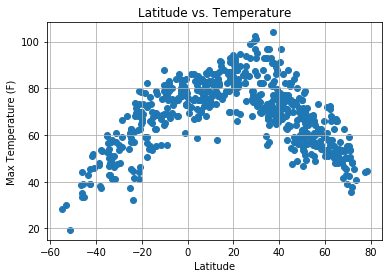

In [26]:
plt.scatter(data_pd["Lat"], data_pd["Temp"],marker="o", label="Cities")

plt.title("Latitude vs. Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig(f"{output_path}/1.png")

plt.show()

## Latitude vs. Humidity Plot

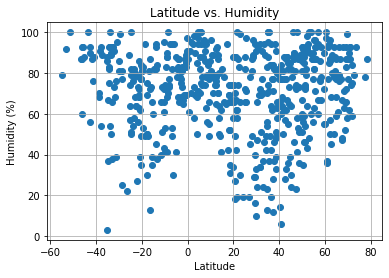

In [27]:
plt.scatter(data_pd["Lat"], data_pd["Humidity"], label="Cities")

plt.title("Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig(f"{output_path}/2.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

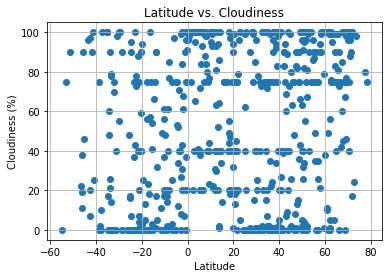

In [28]:
plt.scatter(data_pd["Lat"], data_pd["Cloudiness"], label="Cities")

plt.title("Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)


plt.savefig(f"{output_path}/3.png")

plt.show()

## Latitude vs. Wind Speed Plot

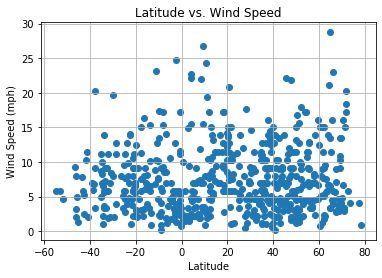

In [29]:
plt.scatter(data_pd["Lat"], data_pd["Wind Speed"], label="Cities")

plt.title("Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig(f"{output_path}/4.png")

plt.show()

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [15]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.8271188905041935


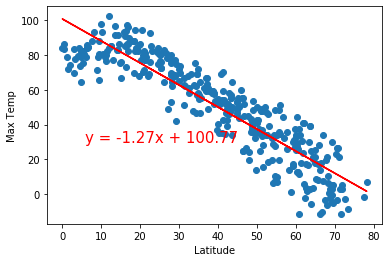

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.39936284758885965


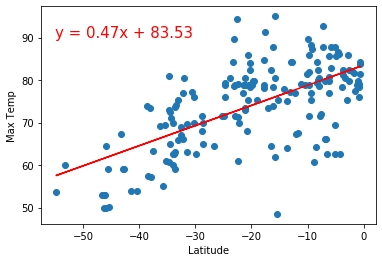

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10829462153873139


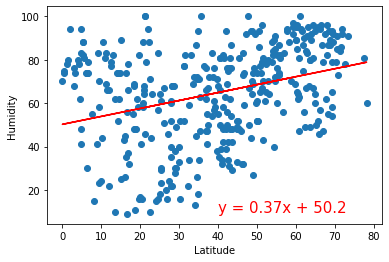

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0008996079328825663


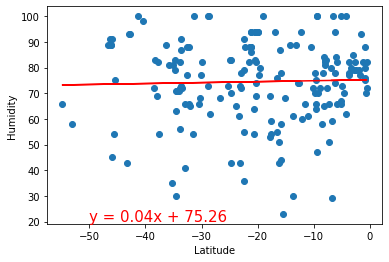

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.05768812657005063


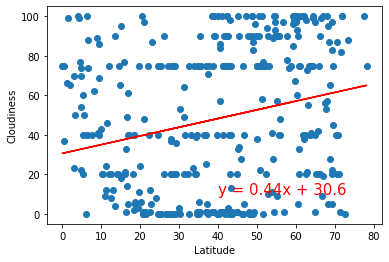

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0684912094859049


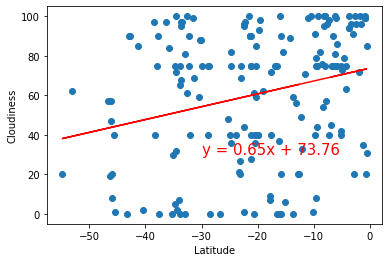

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.023371104533850804


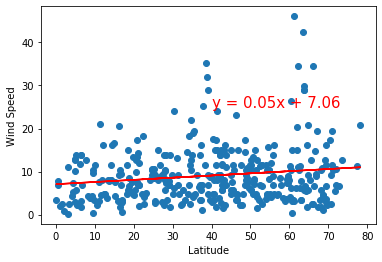

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03381889207758188


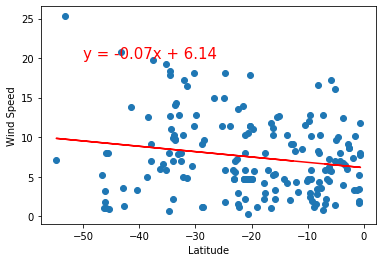